# Machine Learning 201

## Lasso Regression 

* Amaç hata kareler toplamını minimize eden katsayıları bu katsayılara bir ceza uygulayarak bulmaktır.
* Ridge regresyon ile amacı aynıdır.
* Lasso ve Ridge regresyon düzenlileştirme regresyonu olarakta bilinirler.
* Lasso regresyon için L1 yöntemi denir.
* Ridge regresyon için L2 yöntemi denir.

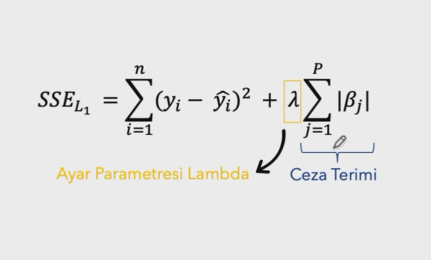

* Ridge regresyonun ilgili-ilgisiz tüm değişkenleri modelde bırakma dezavantajını gidermek için önerilmiştir.
* Lasso'da katsayıları sıfıra yaklaştırır.
* Fakat L1 normu λ yeteri kadar büyük olduğunda bazı katsayıları sıfır yapar. Böylece değişken seçimi yapılmış olur.
* λ'nın doğru seçilmesi çok önemlidir, burada da CV kullanılır.
* Ridge ve Lasso yöntemleri birbirinden üstün değildir.

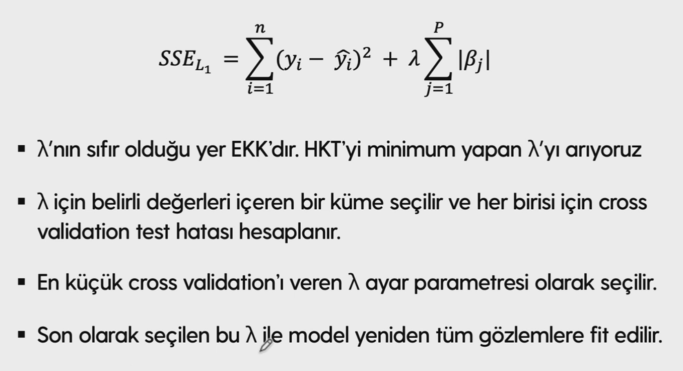

### Model 

In [5]:
import numpy as np
import pandas as pd
from sklearn.linear_model import Ridge,Lasso
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn import model_selection
import matplotlib.pyplot as plt
from sklearn.linear_model import RidgeCV, LassoCV
from sklearn.model_selection import cross_val_score

In [2]:
df = pd.read_csv("Hitters.csv")
df = df.dropna()
dms = pd.get_dummies(df[["League","Division","NewLeague"]]) # kategorik değişkenleri dummy değişkenlere dönüştürdük
y = df["Salary"] # bağımlı değişken
X_ = df.drop(["Salary","League","Division","NewLeague"], axis = 1).astype("float64")
X = pd.concat([X_, dms[["League_N","Division_W","NewLeague_N"]]], axis = 1) # bağımsız değişkenler
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size = 0.25,
                                                    random_state = 42)

In [3]:
df.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N
5,594,169,4,74,51,35,11,4408,1133,19,501,336,194,A,W,282,421,25,750.0,A


In [6]:
lasso_model = Lasso().fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8256653.399850421, tolerance: 3898.686956380658
  model = cd_fast.enet_coordinate_descent(


In [7]:
lasso_model

Lasso()

In [8]:
lasso_model.intercept_

-5.587450677336392

In [9]:
lasso_model.coef_

array([-1.74875691e+00,  8.59204135e+00,  6.67993798e+00, -3.06715333e+00,
       -1.91843070e+00,  5.32372890e+00,  8.39184117e+00, -1.63172447e-01,
       -8.22311277e-02, -3.93602861e-01,  1.71118530e+00,  6.55730545e-01,
       -6.48379405e-01,  2.59815358e-01,  2.73041157e-01, -4.41440454e-01,
        8.54474011e+01, -9.59701213e+01, -2.13086605e+01])

In [10]:
# farklı lambda değerlerine karşılık katsayılar

In [19]:
lasso = Lasso()
coefs = []
alphas = 10**np.linspace(10,-2,100) * 0.5


for a in alphas :
    lasso.set_params(alpha = a)
    lasso.fit(X_train, y_train)
    coefs.append(lasso.coef_)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5469.558741401881, tolerance: 3898.686956380658
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6540.147679433227, tolerance: 3898.686956380658
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4001.756137344986, tolerance: 3898.686956380658
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarnin

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8247805.522216843, tolerance: 3898.686956380658
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8247772.261812326, tolerance: 3898.686956380658
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8247747.060921364, tolerance: 3898.686956380658
  model = cd_fast.enet_coordinate_descent(


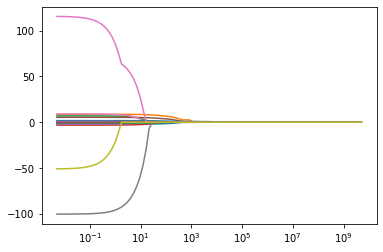

In [20]:
ax = plt.gca()
ax.plot(alphas, coefs)
ax.set_xscale("log")

### Tahmin 

In [22]:
lasso_model # ön tanımlı olarak lambda değeri 1

Lasso()

In [23]:
lasso_model.predict(X_train)[0:5]

array([377.26270596, 786.51524513, 495.14140718, 117.19492966,
       429.04228506])

In [24]:
lasso_model.predict(X_test)[0:5]

array([ 609.18826367,  696.96810702, 1009.06157391,  412.22773375,
        409.25851712])

In [25]:
y_pred = lasso_model.predict(X_test)

In [26]:
np.sqrt(mean_squared_error(y_test, y_pred)) # ilkel test hatası, opitimize edilmemiş modelin test hatası

356.09758845540335

In [27]:
r2_score(y_test, y_pred) # bağımsız değişkenlerce, bağımlı değişkenelrdeki değişikliğin açıklanma yüzdesidir.

0.41422798132366156

### Model Tuning 

In [28]:
# optimum lambda değerini bulmak için lasso_cv fonksiyonu kullanılacak.

In [36]:
alphas = 10**np.linspace(10,-2,100) * 0.5

In [37]:
lasso_cv_model = LassoCV(alphas= alphas, cv = 10, max_iter = 100000).fit(X_train, y_train)

In [38]:
lasso_cv_model.alpha_

201.85086292982749

In [39]:
lasso_tuned = Lasso().set_params(alpha = lasso_cv_model.alpha_).fit(X_train, y_train)

In [40]:
y_pred = lasso_tuned.predict(X_test)

In [41]:
np.sqrt(mean_squared_error(y_test, y_pred))

363.6832708037447

In [42]:
pd.Series(lasso_tuned.coef_, index = X_train.columns) # 0 olan değerler anlamsız değerler

AtBat         -1.052276
Hits           5.342648
HmRun          0.000000
Runs           0.000000
RBI            0.000000
Walks          2.640006
Years          0.000000
CAtBat        -0.174125
CHits          0.249805
CHmRun        -0.000000
CRuns          1.035075
CRBI           0.469281
CWalks        -0.186771
PutOuts        0.272541
Assists        0.170528
Errors        -0.000000
League_N       0.000000
Division_W    -0.000000
NewLeague_N    0.000000
dtype: float64